In [2]:
# Visualize training history
#
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.regularizers import l2
import math
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix

In [3]:
def sigmoid(z):
    g = 1/(1 + math.e**-z)
    return g

In [5]:
def print_confusion_matrix(true_labels, predictions):
    #plot confusion matrix
    mat = confusion_matrix(true_labels, predictions)
    plot_confusion_matrix(conf_mat=mat)

    #Calculate precision, recall, f1_score

    #precision
    precision = precision_score(true_labels, predictions)

    #recall
    recall = recall_score(true_labels, predictions)

    #fl score
    f1 = f1_score(true_labels, predictions)

    #Print precision, recall, f1_score
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")

    return

In [6]:
def calculate_accuracy(labels, predictions):
    
    # Calculate the number of correct predictions by comparing 'labels' and 'predictions'
    correct_predictions = np.sum(labels == predictions)
    
    # Calculate the total number of predictions
    total_predictions = len(labels)
    
    # Calculate the accuracy as a percentage
    accuracy_percentage = (correct_predictions / total_predictions) * 100.0
    
    print(f"Accuracy: {accuracy_percentage:.2f}%")

In [7]:
def get_predictions(feature_data):
    #run feature data through the trained model to get the linera activations from the output layer
    logits = model(feature_data)

    #convert the model outputs to probabilities by running through the sigmoid function
    logits = sigmoid(logits)

    # get predictions by converting output probabilities to True if >= 0.5, and False if < 0.5
    predictions = logits >= 0.5

    #convert True to 1 and False to 0
    predictions = [int(boolean) for boolean in predictions]

    return predictions

In [50]:
#Create datapath 
def preprocess(file):
    #file = "Project1_data/shopping.csv"

    #put data into a pandas dataframe
    df = pd.read_csv(file)
    
    #view dataframe rows
    df.head()
    
    #define replacement mapping
    bool_mapping = {
        "TRUE": 1,
        "FALSE": 0,
    }
    
    month_mapping = {
        "Jan": 1, "Feb": 2, "Mar": 3, "Apr": 4, "May": 5, "June": 6, "Jul": 7, "Aug": 8, "Sep": 9, "Oct": 10, "Nov": 11, "Dec": 12
    }
    
    visit_mapping = {
        "New_Visitor": 1, "Returning_Visitor": 2, "Other": 3
    }
    
    #Convert true/false to strings
    df['Weekend'] = df['Weekend'].astype(str)
    df['Revenue'] = df['Revenue'].astype(str)
    
    df['Weekend'] = df['Weekend'].str.upper()
    df['Revenue'] = df['Revenue'].str.upper()
    
    #Replace non-integer values
    df['Month'] = df['Month'].replace(month_mapping)
    df['VisitorType'] = df['VisitorType'].replace(visit_mapping)
    df['Weekend'] = df['Weekend'].replace(bool_mapping)
    df['Revenue'] = df['Revenue'].replace(bool_mapping)
    
    df.head(10)
    
    #convert dataframe to numpy array
    data_array = df.to_numpy()
    
    return split_data(data_array)

def split_data(data):
    X = data[:, :17]
    y = data[:, 17]
    return X, y


In [51]:
#load the dataset & split into x and y variables
features, y = preprocess("shopping.csv")

#create Scaler object
scaler = StandardScaler()

#scale the features
X = scaler.fit_transform(features)

print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

#look at the first X row
print(X[0])


X shape: (5000, 17)
y shape: (5000,)
[ 0.21173582  0.35206422 -0.38787235 -0.23716731  0.35785985 -0.06903133
 -0.3764785  -0.61938805 -0.31442715 -0.31311801  0.99578857 -1.22770075
  3.26250963  1.17721659  1.71636354  0.36452294 -0.55763754]


In [52]:
# split  data into training, CV, test sets
# use the train_test_split modules
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=35)

#split test set 50:50 for the CV and test sets
X_test, X_cv, y_test, y_cv = train_test_split(X_test, y_test, test_size=0.5)

#Print the shapes of the resulting sets
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"X_cv shape: {X_cv.shape}")

print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")
print(f"y_cv shape: {y_cv.shape}")



X_train shape: (3000, 17)
X_test shape: (1000, 17)
X_cv shape: (1000, 17)
y_train shape: (3000,)
y_test shape: (1000,)
y_cv shape: (1000,)


In [53]:
#create model
model = Sequential([
    tf.keras.Input(shape=(17,)),
    Dense(64, activation='relu', kernel_regularizer=l2(0.00)),
    Dense(32, activation='relu', kernel_regularizer=l2(0.00)),
    Dense(16, activation='relu', kernel_regularizer=l2(0.001)),
    Dense(10, activation='relu', kernel_regularizer=l2(0.00)),
    Dense(1, activation='linear')
])
    

In [54]:
#print model summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 64)                1152      
                                                                 
 dense_11 (Dense)            (None, 32)                2080      
                                                                 
 dense_12 (Dense)            (None, 16)                528       
                                                                 
 dense_13 (Dense)            (None, 10)                170       
                                                                 
 dense_14 (Dense)            (None, 1)                 11        
                                                                 
Total params: 3941 (15.39 KB)
Trainable params: 3941 (15.39 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [55]:
#compile model
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(0.001),
              metrics=['accuracy']    
)

#fit the model
history = model.fit(
    X, y,
    validation_data=(X_cv, y_cv),
    epochs=100
)

Epoch 1/100
157/157 [==============================] - 2s 3ms/step - loss: 0.4416 - accuracy: 0.8554 - val_loss: 0.3002 - val_accuracy: 0.8780
Epoch 2/100
157/157 [==============================] - 0s 2ms/step - loss: 0.2946 - accuracy: 0.8810 - val_loss: 0.2715 - val_accuracy: 0.8880
Epoch 3/100
157/157 [==============================] - 0s 2ms/step - loss: 0.2755 - accuracy: 0.8846 - val_loss: 0.2702 - val_accuracy: 0.8880
Epoch 4/100
157/157 [==============================] - 0s 2ms/step - loss: 0.2660 - accuracy: 0.8872 - val_loss: 0.2515 - val_accuracy: 0.8890
Epoch 5/100
157/157 [==============================] - 0s 2ms/step - loss: 0.2589 - accuracy: 0.8900 - val_loss: 0.2452 - val_accuracy: 0.8950
Epoch 6/100
157/157 [==============================] - 0s 2ms/step - loss: 0.2533 - accuracy: 0.8918 - val_loss: 0.2379 - val_accuracy: 0.8930
Epoch 7/100
157/157 [==============================] - 0s 2ms/step - loss: 0.2483 - accuracy: 0.8966 - val_loss: 0.2398 - val_accuracy: 0.8950

In [56]:
#list history data
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


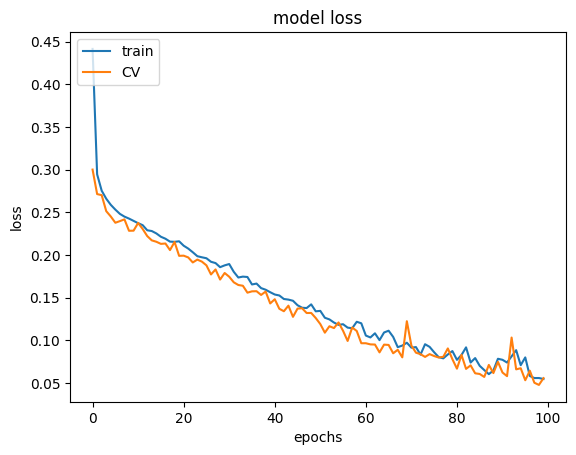

In [57]:
#summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train', 'CV'], loc='upper left')
plt.show()

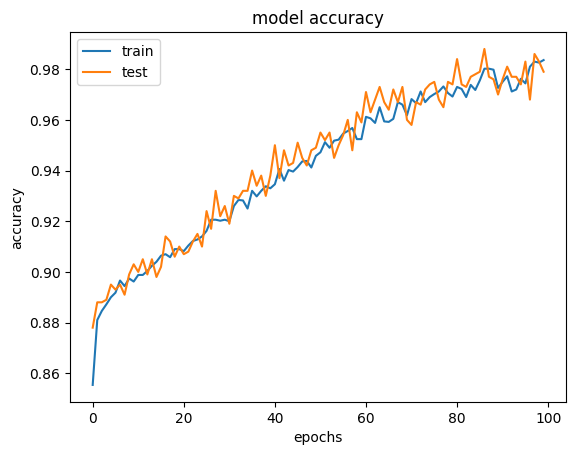

In [58]:
#summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [59]:
#determine the predictions for the training set
prediction_train = get_predictions(X_train)
print(prediction_train)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 

In [60]:
calculate_accuracy(y_train, prediction_train)

Accuracy: 98.73%


Precision: 0.98
Recall: 0.93
F1 Score: 0.96


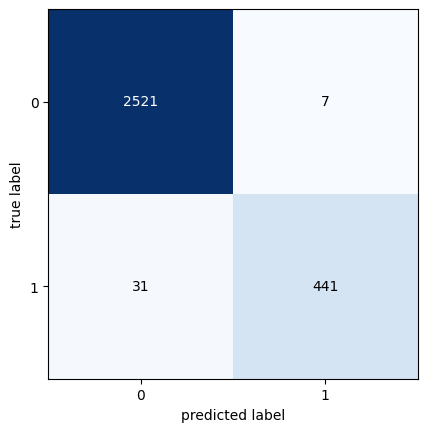

In [61]:
print_confusion_matrix(y_train, prediction_train)

In [62]:
#determine the accuracy for cv set
prediction_cv = get_predictions(X_cv)


In [63]:
calculate_accuracy(y_cv, prediction_cv)

Accuracy: 98.10%


Precision: 0.96
Recall: 0.91
F1 Score: 0.93


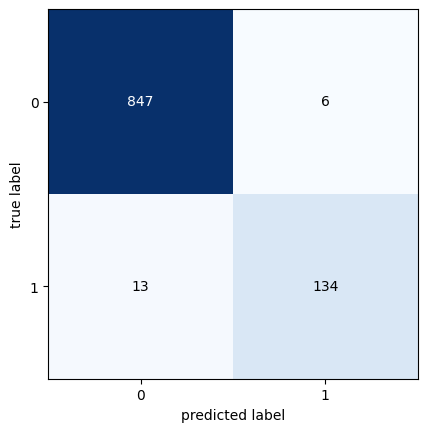

In [64]:
print_confusion_matrix(y_cv, prediction_cv)

In [65]:
#evaluate model on test set
print("Evaluate on test Data")
results = model.evaluate(X_test, y_test)
print(f"test loss, test acc: {results}")

Evaluate on test Data
32/32 [==============================] - 0s 2ms/step - loss: 0.0528 - accuracy: 0.9840
test loss, test acc: [0.05280821770429611, 0.984000027179718]


In [66]:
#determine the accuracy for test set
prediction_test = get_predictions(X_test)


In [67]:
calculate_accuracy(y_test, prediction_test)

Accuracy: 98.70%


Precision: 0.97
Recall: 0.95
F1 Score: 0.96


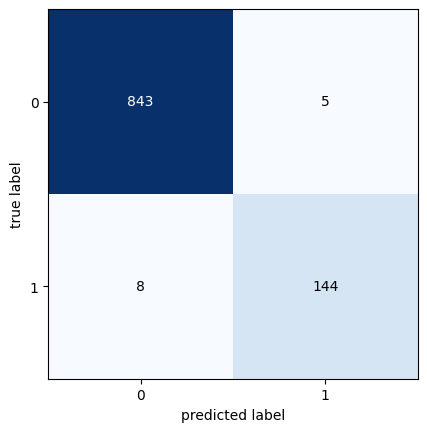

In [68]:
print_confusion_matrix(y_test, prediction_test)

In [69]:
#load the dataset & split into x and y variables
test_features, test_y = preprocess("unseen.csv")

#create Scaler object
scaler = StandardScaler()

#scale the features
X = scaler.fit_transform(test_features)

In [70]:
prediction_test = get_predictions(test_features)

In [71]:
calculate_accuracy(test_y, prediction_test)

Accuracy: 84.80%
